In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)


In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
# 2A. KMeans Clustering
# Description:
# KMeans is a centroid-based clustering algorithm that partitions data into K clusters.
# It minimizes the variance within each cluster using an iterative approach.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

data['KMeans_Cluster'] = kmeans_labels

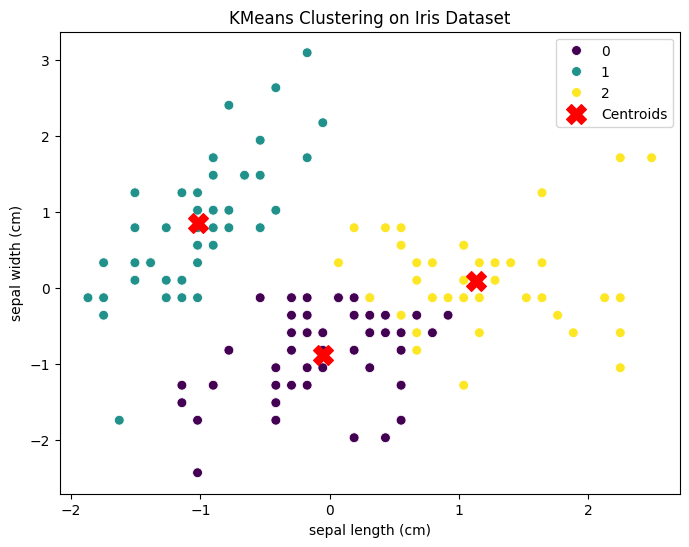

In [6]:
# Visualizing KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KMeans Clustering on Iris Dataset')
plt.legend()
plt.show()


In [7]:
# 2B. Hierarchical Clustering
# Description:
# Hierarchical clustering creates a tree of clusters using either a top-down or bottom-up approach.
# It does not require specifying the number of clusters beforehand.
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

data['Hierarchical_Cluster'] = hierarchical_labels

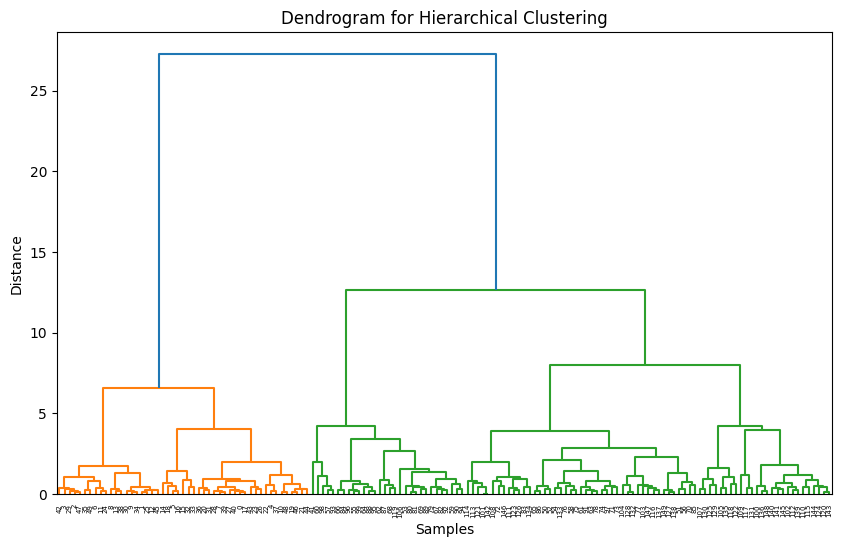

In [8]:
# Visualizing Hierarchical clustering
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

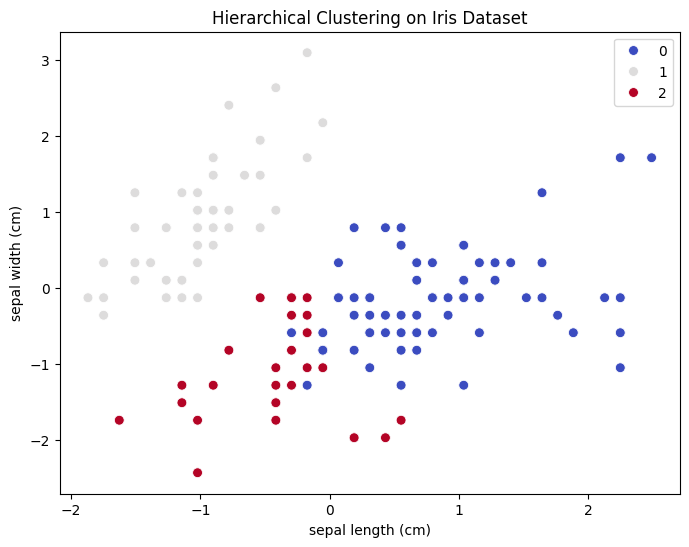

In [9]:
# Scatter plot for hierarchical clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hierarchical_labels, palette='coolwarm', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hierarchical Clustering on Iris Dataset')
plt.show()
